# 1) IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *           # here we need StandardScaler
from sklearn.metrics import *                 # importing accuracy score, f1 score, classification report, etc.
from sklearn.ensemble import *                # importing Random Forest Classifier and Gradient Boosting Classifier
from sklearn.tree import *                    # importing Decision Tree
                                              # we import the classifiers and libraries in following codes.

# 2) READ THE DATA

In [2]:
data=pd.read_csv('mobile_price.csv')

In [3]:
data1=data
data1

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1.0
1,2,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2.0
2,3,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,4,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,5,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,NaN
2996,2997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,NaN
2997,2998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,NaN
2998,2999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,NaN


# 3) (a) DATA PREPROCESSING

In [4]:
# checking the head and tail of the dataset

In [5]:
data1.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1.0
1,2,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2.0
2,3,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,4,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,5,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1.0


In [6]:
data1.tail()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
2995,2996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,NaN
2996,2997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,NaN
2997,2998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,NaN
2998,2999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,NaN
2999,3000,1270,1,0.5,0,4,1,35,0.1,140,...,457,608,2828,9,2,3,1,0,1,NaN


In [7]:
data1.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
dtype: object

In [8]:
data1.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2000.000000
mean,1500.500000,1241.849000,0.502000,1.528467,0.512000,4.404000,0.510000,32.581667,0.507000,140.003000,...,639.112333,1247.601667,2129.141333,12.202667,5.616667,11.035667,0.759667,0.502000,0.507000,1.500000
std,866.169729,437.063804,0.500079,0.820358,0.499939,4.383742,0.499983,18.152810,0.285969,35.213809,...,440.202998,434.666168,1085.694231,4.251151,4.322494,5.474400,0.427357,0.500079,0.500034,1.118314
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,863.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,...,277.750000,865.000000,1212.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1500.500000,1232.000000,1.000000,1.500000,1.000000,3.000000,1.000000,33.000000,0.500000,140.000000,...,564.000000,1248.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,2250.250000,1619.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,...,932.500000,1634.000000,3065.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,3000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
id               3000 non-null int64
battery_power    3000 non-null int64
blue             3000 non-null int64
clock_speed      3000 non-null float64
dual_sim         3000 non-null int64
fc               3000 non-null int64
four_g           3000 non-null int64
int_memory       3000 non-null int64
m_dep            3000 non-null float64
mobile_wt        3000 non-null int64
n_cores          3000 non-null int64
pc               3000 non-null int64
px_height        3000 non-null int64
px_width         3000 non-null int64
ram              3000 non-null int64
sc_h             3000 non-null int64
sc_w             3000 non-null int64
talk_time        3000 non-null int64
three_g          3000 non-null int64
touch_screen     3000 non-null int64
wifi             3000 non-null int64
price_range      2000 non-null float64
dtypes: float64(3), int64(19)
memory usage: 515.8 KB


In [10]:
# checking if any Nan values exits

In [11]:
data1.isna().sum()

id                  0
battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
dtype: int64

In [12]:
# so price range has 1000 null values

In [13]:
# Let us check the values in the price range

In [14]:
data1['price_range'].value_counts()

0.0    500
3.0    500
2.0    500
1.0    500
Name: price_range, dtype: int64

In [15]:
# let us check how much percentage of null values exist in the price range

In [16]:
data1['price_range'].isna().sum() * 100/len(data1)

33.333333333333336

In [17]:
# Here, there is 33.3336% of null values present in the price range, ie, 1000 rows. So, what we going to do is, just remove the 
# null value rows, and use the remaining 2000 rows for further steps like fitting the model.
# atlast, we will predict the price range of the deleted rows using our model.

In [18]:
null_columns=data1.columns[data1.isnull().any()]
print(data1[data1.isnull().any(axis=1)][null_columns].head(1001))

      price_range
2000          NaN
2001          NaN
2002          NaN
2003          NaN
2004          NaN
...           ...
2995          NaN
2996          NaN
2997          NaN
2998          NaN
2999          NaN

[1000 rows x 1 columns]


In [19]:
# So we need to delete the rows from 2000 to 2999....ie, last 1000 rows

In [20]:
data2=data1.dropna(how='any',axis=0)

In [21]:
data2

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1.0
1,2,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2.0
2,3,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,4,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,5,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,794,1,0.5,1,0,1,2,0.8,106,...,1222,1890,668,13,4,19,1,1,0,0.0
1996,1997,1965,1,2.6,1,0,0,39,0.2,187,...,915,1965,2032,11,10,16,1,1,1,2.0
1997,1998,1911,0,0.9,1,1,1,36,0.7,108,...,868,1632,3057,9,1,5,1,1,0,3.0
1998,1999,1512,0,0.9,0,4,1,46,0.1,145,...,336,670,869,18,10,19,1,1,1,0.0


In [22]:
# checcking for, if any null values exist in data 2 or not

In [23]:
data2.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [24]:
# next let us drop the column 'id' because it is not important here.

In [25]:
data2.drop(['id'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
data2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0.0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3.0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0.0


In [27]:
# So, our data set is now ready

In [28]:
data2.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [29]:
# next we need to change the datatype of price range from float to integer. 

In [30]:
data2=data2.astype({'price_range':int})

In [31]:
data2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [32]:
data2.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int32
dtype: object

In [33]:
#To find the correlation

In [34]:
data2.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


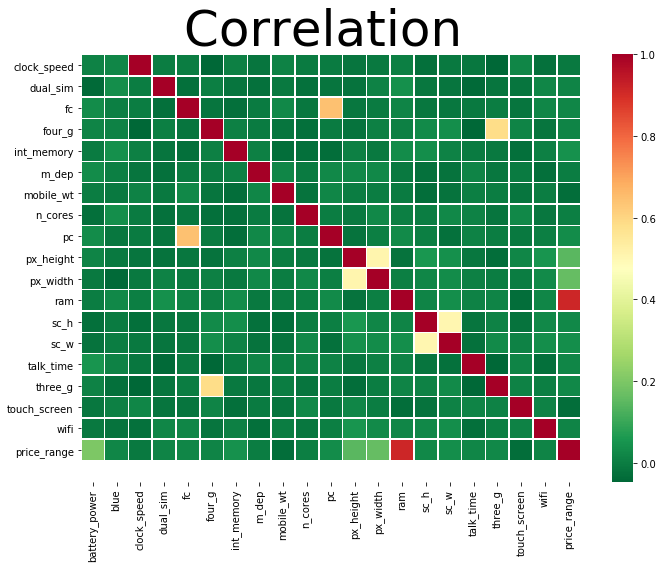

In [35]:
fig = plt.figure(figsize=(10,8))
r = sns.heatmap(data2.corr(), cmap='RdYlGn_r',linewidths=0.5)
r.set_title("Correlation ",fontsize=50)
bottom,top=r.get_ylim()                                  # to adjust the fitting
r.set_ylim(bottom+1.5,top+1.5)
plt.tight_layout()

In [136]:
data2.corr().sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [ ]:
# so as we can see, ram has a very high positive correlation with price range of mobile, followed by battery power
#  px width, px height, internal memory, sc w, pc,...
#  Also, n cores, m dep, clock speed have very low correlation with price range. 

#### (b) Next Let us plot different graphs to express the relationship between price range and other features ( we are taking only those features which have atleast 1% correlation with target variable)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F0594FE88>,
      dtype=object)

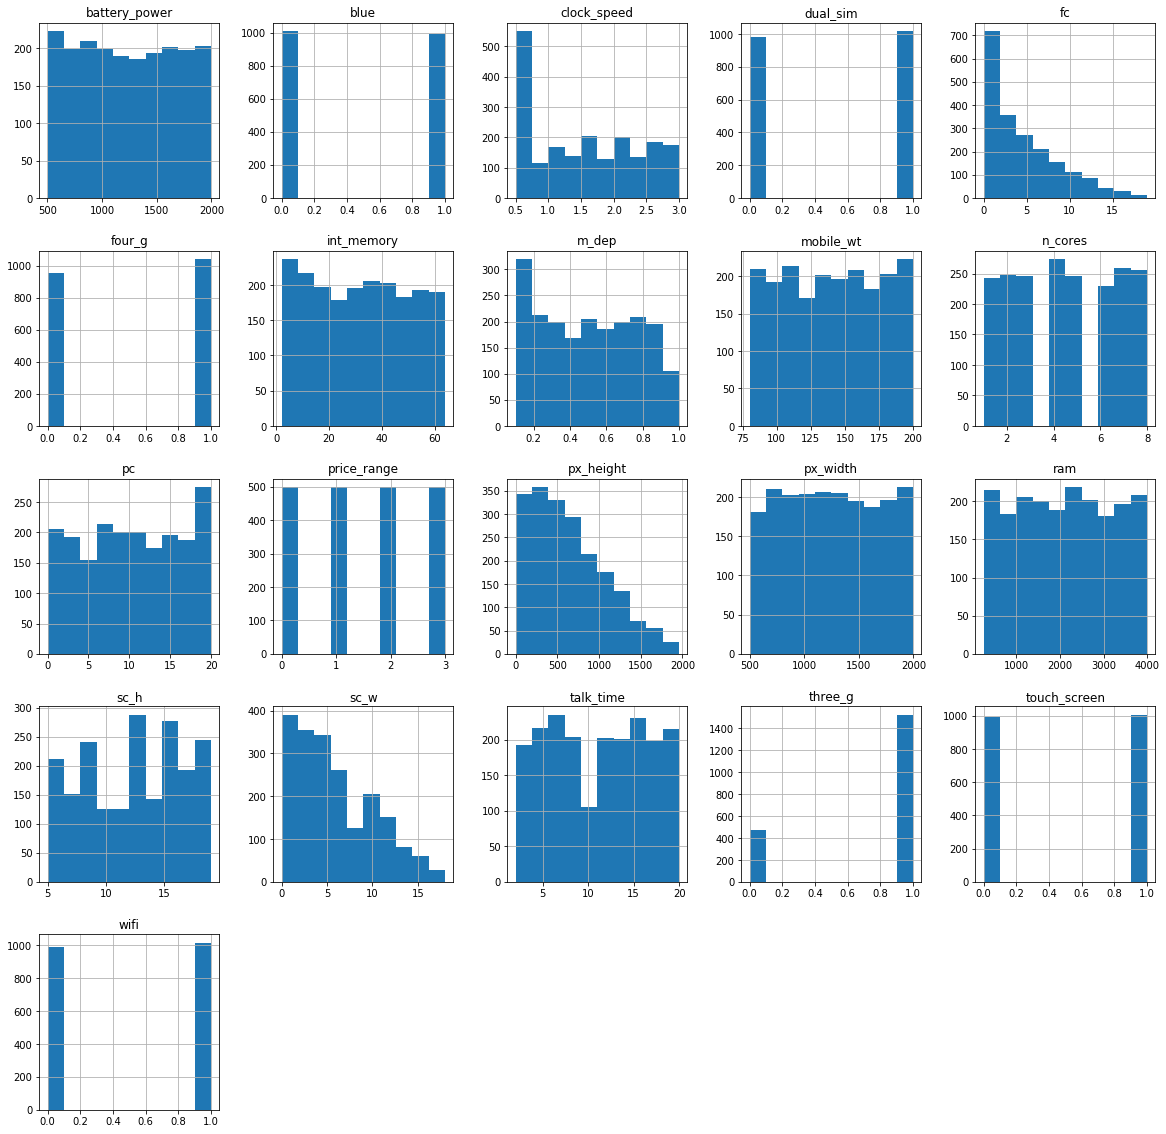

In [36]:
data2.hist(figsize=(20,20))

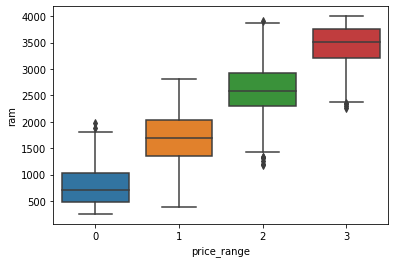

In [37]:
#1) price range and ram

sns.boxplot(data2['price_range'],data2['ram'])

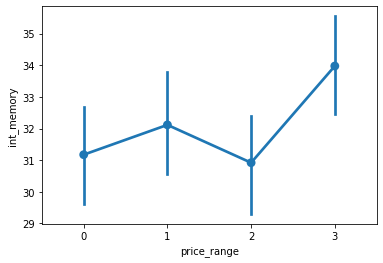

In [38]:
# price range and internal memory

sns.pointplot(y="int_memory", x="price_range", data=data2)

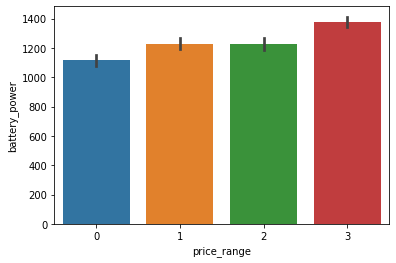

In [39]:
#price range and battery power

sns.barplot(data2['price_range'],data2['battery_power'])

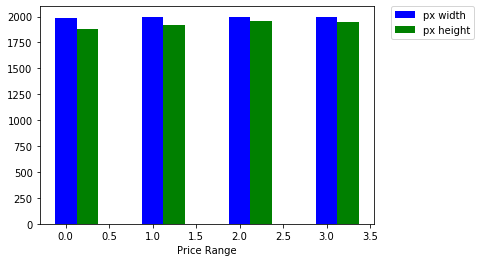

In [105]:
X = data2['price_range']
plt.bar(X + 0.00, data2['px_width'], color = 'b', width = 0.25,label='px width')
plt.bar(X + 0.25, data2['px_height'], color = 'g', width = 0.25,label='px height')
plt.xlabel('Price Range')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

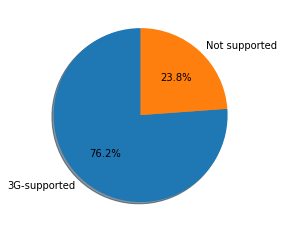

In [41]:
# % of phones supporting 3g

labels = ["3G-supported",'Not supported']
values=data2['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

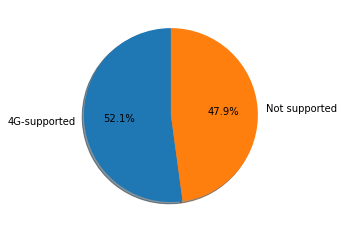

In [42]:
# % of phones supporting 4g

labels4g = ["4G-supported",'Not supported']
values4g = data2['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()


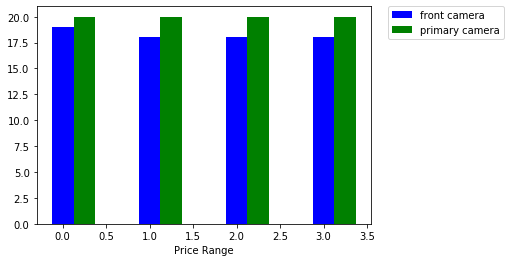

In [104]:
# No of Phones vs Camera megapixels of front and primary camera

X = data2['price_range']
plt.bar(X + 0.00, data2['fc'], color = 'b', width = 0.25,label='front camera')
plt.bar(X + 0.25, data2['pc'], color = 'g', width = 0.25,label='primary camera')
plt.xlabel('Price Range')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

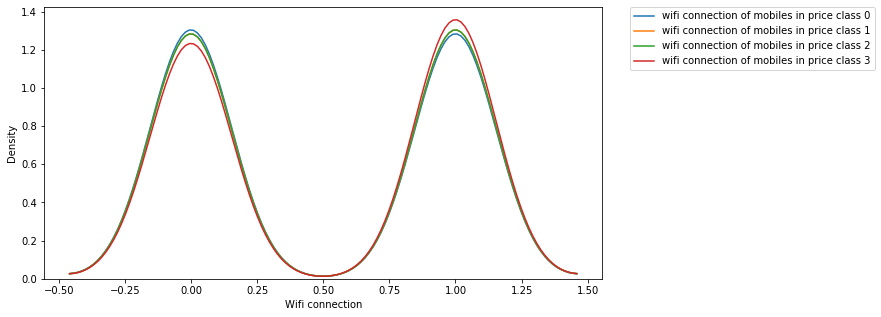

In [125]:
plt.figure(figsize=(10,5))
sns.kdeplot(data2.loc[data2['price_range']==0,'wifi'],label='wifi connection of mobiles in price class 0')
sns.kdeplot(data2.loc[data2['price_range']==1,'wifi'],label='wifi connection of mobiles in price class 1')
sns.kdeplot(data2.loc[data2['price_range']==2,'wifi'],label='wifi connection of mobiles in price class 2')
sns.kdeplot(data2.loc[data2['price_range']==3,'wifi'],label='wifi connection of mobiles in price class 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Wifi connection')
plt.ylabel('Density')
plt.show()

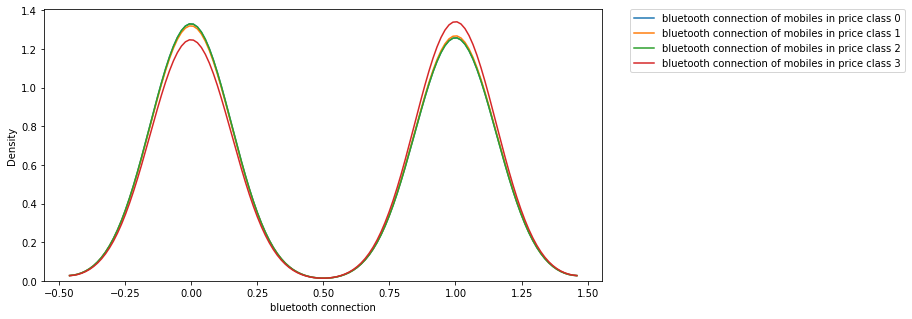

In [132]:
plt.figure(figsize=(10,5))
sns.kdeplot(data2.loc[data2['price_range']==0,'blue'],label='bluetooth connection of mobiles in price class 0')
sns.kdeplot(data2.loc[data2['price_range']==1,'blue'],label='bluetooth connection of mobiles in price class 1')
sns.kdeplot(data2.loc[data2['price_range']==2,'blue'],label='bluetooth connection of mobiles in price class 2')
sns.kdeplot(data2.loc[data2['price_range']==3,'blue'],label='bluetooth connection of mobiles in price class 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('bluetooth connection')
plt.ylabel('Density')
plt.show()

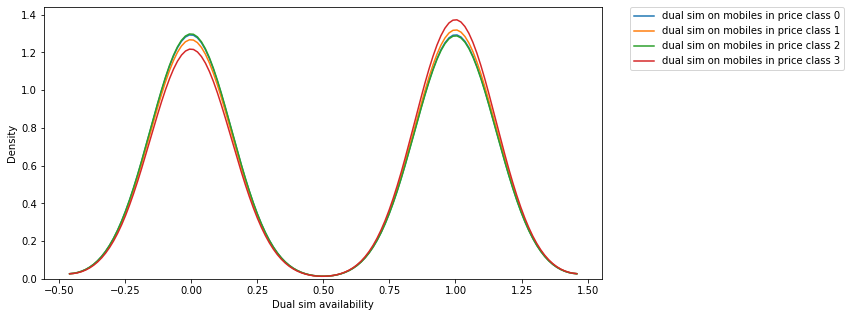

In [133]:
plt.figure(figsize=(10,5))
sns.kdeplot(data2.loc[data2['price_range']==0,'dual_sim'],label='dual sim on mobiles in price class 0')
sns.kdeplot(data2.loc[data2['price_range']==1,'dual_sim'],label='dual sim on mobiles in price class 1')
sns.kdeplot(data2.loc[data2['price_range']==2,'dual_sim'],label='dual sim on mobiles in price class 2')
sns.kdeplot(data2.loc[data2['price_range']==3,'dual_sim'],label='dual sim on mobiles in price class 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Dual sim availability')
plt.ylabel('Density')
plt.show()

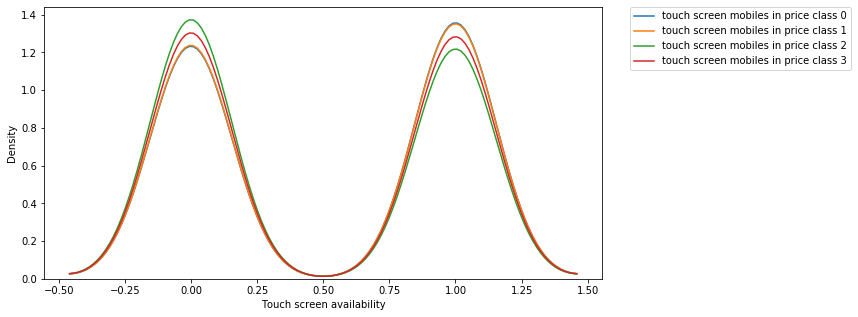

In [134]:
plt.figure(figsize=(10,5))
sns.kdeplot(data2.loc[data2['price_range']==0,'touch_screen'],label='touch screen mobiles in price class 0')
sns.kdeplot(data2.loc[data2['price_range']==1,'touch_screen'],label='touch screen mobiles in price class 1')
sns.kdeplot(data2.loc[data2['price_range']==2,'touch_screen'],label='touch screen mobiles in price class 2')
sns.kdeplot(data2.loc[data2['price_range']==3,'touch_screen'],label='touch screen mobiles in price class 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Touch screen availability')
plt.ylabel('Density')
plt.show()

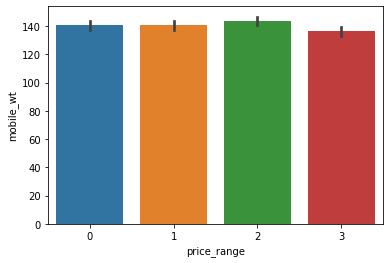

In [86]:
sns.barplot(data2['price_range'],data2['mobile_wt'])

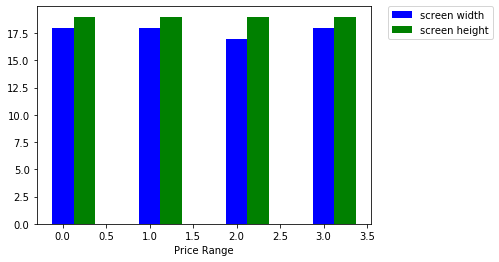

In [106]:
X = data2['price_range']
plt.bar(X + 0.00, data2['sc_w'], color = 'b', width = 0.25,label='screen width')
plt.bar(X + 0.25, data2['sc_h'], color = 'g', width = 0.25,label='screen height')
plt.xlabel('Price Range')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

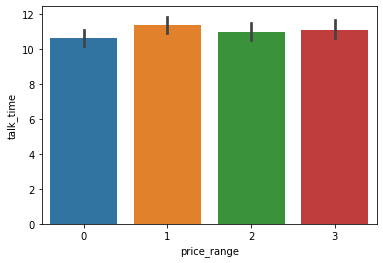

In [135]:
sns.barplot(data2['price_range'],data2['talk_time'])

# 4) SPLITTING THE DATA INTO TRAIN AND TEST SET AND STANDARDISING THE DATA

In [46]:
from sklearn.model_selection import train_test_split
x=data2.drop(['price_range'],axis=1).values
y=data2['price_range'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [47]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# 5)  FITTING THE MODELS.

### a) LOGISTIC REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
clf1=LogisticRegression(random_state=0)
clf1.fit(x_train,y_train)
y_pred1=clf1.predict(x_test)
print(y_pred1)
print('\033[95m' '\033[1m' + 'Confusion Matrix:\n', confusion_matrix(y_test,y_pred1))
print('\033[4m' '\033[1m' + 'Classification Report:\n',classification_report(y_test,y_pred1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[3 0 2 1 3 0 0 3 3 1 0 3 0 2 3 0 3 2 2 0 0 0 3 1 1 2 3 1 3 1 1 0 1 0 2 3 0
 0 3 3 3 2 3 3 1 3 0 2 3 2 1 3 0 3 0 2 2 1 0 3 3 1 3 2 2 2 3 2 2 2 3 2 1 0
 1 3 2 2 2 1 3 3 3 0 0 0 2 1 1 3 1 2 2 0 0 3 3 3 0 3 1 2 2 1 3 1 3 3 2 3 3
 0 0 2 3 3 0 0 1 0 0 3 2 2 1 2 1 1 0 1 1 3 3 3 3 3 3 1 0 0 1 2 1 3 0 3 0 0
 2 0 1 1 2 1 3 0 0 3 1 3 2 1 3 2 2 3 3 2 2 0 3 2 2 3 3 0 1 2 3 0 2 1 0 2 2
 1 1 0 3 3 1 1 0 2 2 0 0 2 2 0 3 3 3 1 1 3 3 3 0 0 0 1 3 3 0 0 1 3 2 3 3 3
 0 0 2 3 3 2 0 2 0 0 0 3 2 0 1 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 0 0 0 2 3 3
 2 0 0 1 2 3 1 2 3 2 1 0 3 3 1 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 3 0 1 2 0 1 2
 3 0 2 0 1 1 3 0 0 2 3 0 1 0 1 0 3 0 3 3 2 3 1 1 2 0 1 2 0 1 0 3 1 0 3 0 0
 0 3 0 3 2 2 0 1 3 0 2 1 0 2 1 2 0 2 0 0 3 1 2 3 1 3 0 3 2 2 1 2 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 1 0 1 2 3 0 0 1 3 0 3 0 1 2 1 1 0 2 0 0 1 3 0 3 3 0
 2 2 3 1 1 3 2 0 3 2 2 0 0 3 0 0 1 1 3 1 2 2 0 3 0 0 2 3 0 0 3 2 2 2 3 0 0
 1 2 1 2 0 3 3 0 3 3 0 2 1 0 0 1 2 1 3 1 2 0 1 0 3 3 2 1 0 3 0 2 0 0 1 3 0
 3 0 0 1 1 0 1 3 0 3 1 0 

### b) RANDOM FOREST CLASSIFIER

In [50]:
clf2=RandomForestClassifier(n_estimators=200,random_state=0)
clf2.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
y_pred2=clf2.predict(x_test)
print(y_pred2)
print('\033[95m' '\033[1m' + 'Confusion Matrix:\n', confusion_matrix(y_test,y_pred2))
print('\033[4m' '\033[1m' + 'Classification Report:\n',classification_report(y_test,y_pred2))

[3 0 2 1 3 0 0 3 3 1 0 3 0 2 3 0 3 1 2 1 0 0 3 1 1 2 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 2 1 3 2 1 3 0 1 2 1 1 2 0 3 0 2 2 1 0 3 3 1 3 2 1 2 3 2 1 2 3 2 1 0
 1 3 2 1 1 1 3 3 3 0 0 0 2 0 2 3 1 2 2 1 0 3 2 3 0 3 1 2 2 1 3 1 2 3 2 3 2
 0 0 1 2 3 0 0 1 0 0 3 2 2 1 2 1 1 0 2 1 3 2 3 3 3 3 1 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 1 2 3 0 2 1 0 1 3
 1 2 0 2 3 1 1 0 2 3 0 1 3 2 0 3 3 2 1 1 3 3 3 0 0 0 2 3 3 0 0 1 3 1 3 3 3
 0 0 2 2 3 1 0 2 0 0 0 3 3 0 2 2 0 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 1 3 2
 2 0 0 1 2 3 2 2 3 2 1 0 3 3 1 1 3 2 2 2 1 0 2 1 1 0 0 2 2 2 2 0 1 2 0 1 2
 3 0 2 0 1 1 3 0 0 1 3 1 1 0 2 0 3 0 3 3 2 2 1 1 2 1 1 2 0 1 0 3 1 0 3 1 0
 1 2 0 3 2 1 0 1 3 0 1 1 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 2 1 2 2 3 3 3 0
 2 0 3 0 1 1 2 2 1 3 1 1 0 1 2 3 0 0 1 3 0 2 0 1 2 1 1 0 2 0 0 1 3 0 3 3 0
 2 1 3 2 1 3 2 0 2 3 2 0 0 3 0 0 1 1 3 1 3 2 0 3 0 0 1 3 0 0 3 2 2 2 3 0 0
 1 2 0 2 0 3 3 0 2 3 0 2 1 1 0 2 2 1 3 2 2 0 1 0 3 3 2 1 0 3 0 2 0 0 1 3 0
 3 0 0 1 1 0 1 2 0 2 2 1 

### c) DECISION TREE CLASSIFIER

In [52]:
clf3=DecisionTreeClassifier(random_state=0)
clf3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [53]:
y_pred3=clf3.predict(x_test)
print(y_pred3)
print('\033[95m' '\033[1m' + 'Confusion Matrix:\n', confusion_matrix(y_test,y_pred3))
print('\033[4m' '\033[1m' + 'Classification Report:\n',classification_report(y_test,y_pred3))

[3 0 2 2 3 0 1 2 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 1 3 0
 0 3 3 2 1 3 3 1 3 0 1 2 1 0 2 0 3 0 3 2 1 0 2 2 1 2 2 1 2 3 3 2 2 3 2 1 0
 0 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 3 2 0 0 3 2 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 2 3 0 1 1 0 0 3 2 2 1 2 1 1 0 1 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 2 1 3 1 0 3 1 3 2 1 3 1 2 3 3 3 1 0 3 1 2 3 3 0 2 2 3 0 3 1 0 1 2
 1 3 0 2 3 1 1 1 2 3 0 0 2 2 0 3 3 2 2 1 3 2 2 0 0 0 2 3 3 0 0 0 3 1 3 3 3
 0 0 2 2 3 2 0 2 0 0 0 3 3 1 2 2 0 1 0 2 3 2 0 0 1 3 3 1 3 0 3 0 1 0 1 3 2
 3 0 0 1 2 3 2 2 3 1 1 0 3 3 1 1 3 2 2 2 1 0 2 2 2 0 0 2 2 1 1 0 1 3 0 1 3
 2 0 1 0 1 1 3 0 0 1 3 1 2 0 1 0 3 0 3 3 2 2 1 2 2 0 1 2 0 1 0 3 1 0 3 1 0
 1 2 0 3 1 1 0 1 2 0 1 2 1 2 1 1 0 2 0 1 3 1 2 3 1 2 0 3 3 2 1 2 2 3 3 3 0
 2 0 3 0 1 1 2 2 1 2 1 2 1 1 2 2 0 0 1 3 0 2 1 1 2 1 1 0 2 1 0 1 3 0 3 3 0
 2 1 3 1 1 3 2 0 2 2 2 0 0 3 0 1 1 1 2 2 2 1 0 2 0 0 1 3 0 0 3 2 2 1 3 0 0
 1 2 0 2 0 3 3 0 3 3 0 2 1 0 0 2 2 1 3 2 2 0 2 0 3 3 2 2 0 3 1 2 0 0 1 3 1
 3 0 0 1 2 0 1 2 0 2 2 1 

### d) SVM

In [54]:
from sklearn.svm import SVC
clf4=SVC(kernel='linear',random_state=0)
clf4.fit(x_train,y_train)
y_pred4=clf4.predict(x_test)
print(y_pred4)
print('\033[95m' '\033[1m' + 'Confusion Matrix:\n', confusion_matrix(y_test,y_pred4))
print('\033[4m' '\033[1m' + 'Classification Report:\n',classification_report(y_test,y_pred4))

[3 0 2 2 2 0 0 3 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 1 0 1 3 0
 0 3 3 2 1 3 2 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 2 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 1 1 2 3 1 2 2 0 0 3 3 3 0 3 1 1 2 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 1 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 1 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 1 3 3 0 1 2 3 0 2 1 0 1 2
 1 2 0 2 3 1 1 0 2 2 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 1 3 3 3
 0 0 2 2 3 1 0 2 0 0 0 3 2 1 2 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 2 2 2 1 0 2 1 1 0 0 2 2 2 2 0 1 2 0 2 2
 3 0 2 0 1 1 3 0 0 1 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 0 1 1 0 1 0 3 1 0 3 0 0
 0 3 0 3 1 1 0 1 3 0 2 1 1 2 1 1 0 2 0 1 3 1 2 3 2 2 0 3 2 1 1 2 2 3 3 3 0
 2 0 3 0 1 1 1 2 1 2 1 2 0 1 2 3 0 0 1 3 0 3 0 1 2 1 1 0 2 0 0 1 3 0 3 3 0
 2 1 3 1 1 3 2 0 3 2 2 0 0 3 0 1 1 1 3 2 3 2 0 2 0 0 1 3 0 0 3 2 2 2 3 0 1
 1 2 1 2 0 3 3 0 2 3 0 2 2 0 0 2 2 0 3 2 2 0 2 0 3 3 2 1 0 3 0 2 0 0 1 3 0
 3 0 0 1 2 0 1 3 0 2 2 1 

In [142]:
y_proba=clf.predict_proba(x_test)
y_proba

array([[0.11538462, 0.15384615, 0.38461538, 0.34615385],
       [0.5       , 0.26923077, 0.23076923, 0.        ],
       [0.15384615, 0.42307692, 0.38461538, 0.03846154],
       ...,
       [0.26923077, 0.26923077, 0.30769231, 0.15384615],
       [0.23076923, 0.03846154, 0.34615385, 0.38461538],
       [0.26923077, 0.30769231, 0.19230769, 0.23076923]])

### e) GRADIENT BOOSTING CLASSIFIER

In [55]:
clf5=GradientBoostingClassifier(random_state=0)
clf5.fit(x_train,y_train)
y_pred5=clf5.predict(x_test)
print(y_pred5)
print('\033[95m' '\033[1m' + 'Confusion Matrix:\n', confusion_matrix(y_test,y_pred5))
print('\033[4m' '\033[1m' + 'Classification Report:\n',classification_report(y_test,y_pred5))

[3 0 2 1 2 0 0 3 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 1 1 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 2 1 3 2 1 3 0 1 2 1 1 3 0 3 0 2 2 1 0 3 3 1 2 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 1 1 1 3 3 3 0 0 0 2 0 2 3 1 2 2 1 0 3 2 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 2 3 0 1 0 0 0 3 2 2 1 1 1 1 0 2 1 3 2 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 0 2 1 0 1 2
 1 2 0 2 3 1 1 0 2 3 0 1 2 2 0 3 3 2 1 1 3 3 3 0 0 0 2 3 3 0 0 1 3 1 3 3 3
 0 0 2 2 3 1 0 2 0 0 0 3 2 0 2 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 1 3 3
 2 0 0 1 2 3 2 1 3 1 1 0 3 3 1 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 2 0 1 3 0 1 2
 3 0 2 0 1 1 3 0 0 1 3 1 2 0 1 0 3 0 3 3 2 2 1 2 2 1 1 2 0 1 0 3 1 0 3 0 0
 1 2 0 3 1 1 0 1 3 0 2 1 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 1 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 2 1 2 1 1 0 1 2 3 0 0 1 3 0 2 0 1 2 1 1 0 2 1 0 1 3 0 3 3 0
 2 1 3 1 1 3 2 0 2 2 2 0 0 3 0 0 1 1 3 2 2 2 0 2 0 0 1 3 0 0 3 2 1 2 3 0 0
 1 2 0 2 0 3 3 0 2 3 0 2 2 1 0 2 2 1 3 2 2 0 2 0 3 3 2 1 0 3 0 2 0 0 1 3 0
 3 0 0 1 2 0 1 3 0 2 2 1 

### f) KNN

Text(0, 0.5, 'Accuracy')

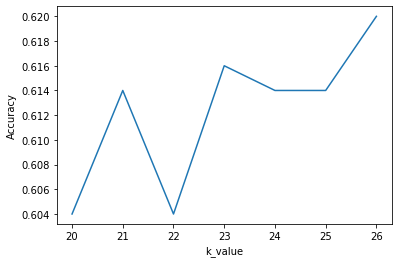

In [56]:
from sklearn.neighbors import KNeighborsClassifier

 # a) minkowski
k_value=[]
for k in np.arange(20,27):    
    clf=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    k_value.append(acc)

plt.plot(np.arange(20,27),k_value) 
plt.xlabel('k_value')
plt.ylabel('Accuracy')

In [57]:
# so let us take k=26

In [58]:
clf6=KNeighborsClassifier(n_neighbors=26,metric='minkowski')
clf6.fit(x_train,y_train)
y_pred6=clf6.predict(x_test)
print(y_pred6)
print('\033[95m' '\033[1m' + 'Confusion Matrix:\n', confusion_matrix(y_test,y_pred6))
print('\033[4m' '\033[1m' + 'Classification Report:\n',classification_report(y_test,y_pred6))

[3 0 2 1 1 0 0 2 1 0 1 3 1 2 2 1 3 2 1 0 1 0 3 0 2 1 3 2 2 0 1 0 1 0 1 2 0
 0 2 3 3 0 3 1 0 3 1 1 2 1 1 2 0 2 0 2 2 2 0 2 3 3 1 2 2 1 2 2 2 1 3 0 1 0
 2 2 2 2 1 1 2 3 3 0 1 0 2 1 2 3 1 2 1 0 2 3 3 3 0 3 0 2 2 1 3 2 3 2 2 3 2
 0 0 0 1 2 0 1 1 0 0 3 2 2 0 2 0 1 0 3 1 3 2 3 3 3 3 1 0 0 0 3 1 2 0 3 1 0
 2 0 1 1 1 1 3 1 0 2 1 3 2 0 2 2 1 3 3 1 1 0 3 1 1 3 3 0 2 1 3 1 2 1 0 1 2
 1 2 0 2 3 1 1 0 2 2 0 0 2 2 0 3 3 2 1 2 2 3 3 0 0 0 3 2 3 0 0 0 3 0 3 2 3
 1 0 2 3 2 2 1 1 1 0 0 3 2 1 2 1 1 1 0 2 2 3 1 0 1 3 3 1 3 0 3 1 0 0 1 3 3
 1 0 0 1 2 3 1 2 2 2 1 0 2 3 3 1 3 2 1 2 1 1 2 1 2 0 0 1 2 1 2 0 1 3 0 2 2
 3 0 1 0 1 1 3 0 0 2 2 2 1 0 1 1 3 1 3 3 2 2 0 2 3 2 1 0 1 1 0 2 1 0 3 0 0
 0 2 0 3 2 1 1 2 3 0 2 1 1 1 1 1 0 2 0 1 2 1 2 3 3 1 0 2 2 2 1 2 1 3 3 2 0
 2 0 1 1 1 0 0 2 1 2 1 1 0 1 1 3 1 1 1 3 0 3 0 1 1 1 1 0 2 1 0 1 2 0 3 2 0
 3 0 3 1 3 3 2 1 3 2 2 0 0 2 1 1 1 0 3 2 2 1 0 3 0 1 1 3 0 0 2 2 1 1 1 0 2
 1 2 0 2 0 2 3 0 3 2 0 2 2 0 0 0 2 0 2 2 3 0 1 1 2 2 2 1 1 3 1 2 0 1 0 2 0
 2 0 0 2 3 1 2 3 0 1 3 1 

Text(0, 0.5, 'Accuracy')

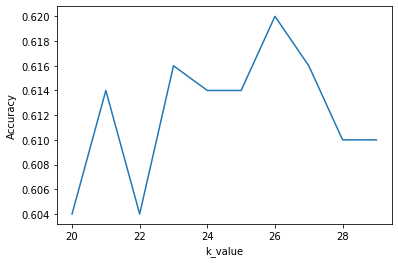

In [59]:
#b) Euclidean

k_value=[]
for k in np.arange(20,30):    
    clf=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    k_value.append(acc)

plt.plot(np.arange(20,30),k_value) 
plt.xlabel('k_value')
plt.ylabel('Accuracy')

In [60]:
clf7=KNeighborsClassifier(n_neighbors=26,metric='euclidean')
clf7.fit(x_train,y_train)
y_pred7=clf7.predict(x_test)
print(y_pred7)
print('\033[95m' '\033[1m' + 'Confusion Matrix:\n', confusion_matrix(y_test,y_pred7))
print('\033[4m' '\033[1m' + 'Classification Report:\n',classification_report(y_test,y_pred7))

[3 0 2 1 1 0 0 2 1 0 1 3 1 2 2 1 3 2 1 0 1 0 3 0 2 1 3 2 2 0 1 0 1 0 1 2 0
 0 2 3 3 0 3 1 0 3 1 1 2 1 1 2 0 2 0 2 2 2 0 2 3 3 1 2 2 1 2 2 2 1 3 0 1 0
 2 2 2 2 1 1 2 3 3 0 1 0 2 1 2 3 1 2 1 0 2 3 3 3 0 3 0 2 2 1 3 2 3 2 2 3 2
 0 0 0 1 2 0 1 1 0 0 3 2 2 0 2 0 1 0 3 1 3 2 3 3 3 3 1 0 0 0 3 1 2 0 3 1 0
 2 0 1 1 1 1 3 1 0 2 1 3 2 0 2 2 1 3 3 1 1 0 3 1 1 3 3 0 2 1 3 1 2 1 0 1 2
 1 2 0 2 3 1 1 0 2 2 0 0 2 2 0 3 3 2 1 2 2 3 3 0 0 0 3 2 3 0 0 0 3 0 3 2 3
 1 0 2 3 2 2 1 1 1 0 0 3 2 1 2 1 1 1 0 2 2 3 1 0 1 3 3 1 3 0 3 1 0 0 1 3 3
 1 0 0 1 2 3 1 2 2 2 1 0 2 3 3 1 3 2 1 2 1 1 2 1 2 0 0 1 2 1 2 0 1 3 0 2 2
 3 0 1 0 1 1 3 0 0 2 2 2 1 0 1 1 3 1 3 3 2 2 0 2 3 2 1 0 1 1 0 2 1 0 3 0 0
 0 2 0 3 2 1 1 2 3 0 2 1 1 1 1 1 0 2 0 1 2 1 2 3 3 1 0 2 2 2 1 2 1 3 3 2 0
 2 0 1 1 1 0 0 2 1 2 1 1 0 1 1 3 1 1 1 3 0 3 0 1 1 1 1 0 2 1 0 1 2 0 3 2 0
 3 0 3 1 3 3 2 1 3 2 2 0 0 2 1 1 1 0 3 2 2 1 0 3 0 1 1 3 0 0 2 2 1 1 1 0 2
 1 2 0 2 0 2 3 0 3 2 0 2 2 0 0 0 2 0 2 2 3 0 1 1 2 2 2 1 1 3 1 2 0 1 0 2 0
 2 0 0 2 3 1 2 3 0 1 3 1 

Text(0, 0.5, 'Accuracy')

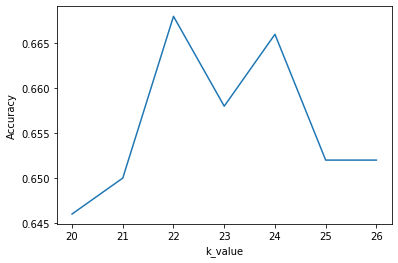

In [61]:
#c) Manhattan

k_value=[]
for k in np.arange(20,27):    
    clf=KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    k_value.append(acc)

plt.plot(np.arange(20,27),k_value) 
plt.xlabel('k_value')
plt.ylabel('Accuracy')

In [62]:
clf8=KNeighborsClassifier(n_neighbors=22,metric='manhattan')
clf8.fit(x_train,y_train)
y_pred8=clf8.predict(x_test)
print(y_pred8)
print('\033[95m' '\033[1m' + 'Confusion Matrix:\n', confusion_matrix(y_test,y_pred8))
print('\033[4m' '\033[1m' + 'Classification Report:\n',classification_report(y_test,y_pred8))

[3 0 1 1 1 0 0 2 3 2 1 3 1 2 2 0 3 2 1 0 1 0 3 2 2 2 3 1 2 0 1 0 1 0 1 3 0
 0 2 3 3 2 3 2 1 3 1 2 2 1 1 2 0 2 0 2 2 2 0 1 3 1 2 2 2 1 2 2 2 1 3 2 1 0
 1 3 2 2 1 1 2 3 3 0 1 0 2 1 1 3 1 2 1 0 2 3 3 3 0 3 0 1 2 1 3 2 2 2 2 3 2
 1 0 2 1 1 0 0 1 0 0 3 2 2 1 2 0 0 0 3 0 2 2 3 3 3 3 1 0 1 2 0 1 2 0 2 1 0
 2 0 1 1 1 0 3 0 0 2 1 1 2 0 2 1 2 3 3 1 1 0 3 1 0 3 3 1 2 1 3 1 2 1 0 1 2
 1 2 0 2 3 1 1 0 2 3 0 0 2 2 0 3 3 3 1 3 2 2 2 0 0 0 2 2 3 0 0 1 3 1 3 2 3
 0 0 2 3 2 2 0 2 0 0 0 3 2 1 2 1 1 1 0 2 3 2 0 0 1 2 2 1 3 0 3 0 1 0 1 3 3
 1 0 1 1 2 3 1 1 2 2 1 0 2 3 2 0 3 2 1 2 1 0 2 1 1 0 0 1 2 1 2 0 1 3 0 2 2
 3 0 1 0 1 1 3 0 0 2 3 0 1 0 2 1 2 1 3 3 2 1 0 3 1 2 1 2 0 2 0 1 1 0 3 1 1
 1 2 0 3 2 2 0 0 3 0 2 1 1 1 1 1 0 1 0 1 2 1 3 3 1 3 0 3 2 2 1 1 1 3 3 3 0
 2 0 2 0 1 0 0 2 1 0 1 1 0 1 2 3 1 1 1 3 0 1 0 2 2 1 1 0 2 1 0 1 3 0 3 2 0
 1 1 3 2 3 3 2 1 2 2 2 0 0 2 0 0 0 2 3 2 2 1 0 3 0 0 1 3 0 0 3 2 2 2 1 0 2
 1 2 1 2 0 3 3 0 2 2 0 2 0 1 0 0 2 0 3 2 2 0 1 0 2 2 1 2 0 3 1 2 0 1 1 2 0
 2 0 0 2 3 0 1 3 0 2 3 1 

In [ ]:
# At last we are going to predict the price range of our test dataset using svm.

In [63]:
data3=data

In [64]:
data3

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1.0
1,2,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2.0
2,3,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,4,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,5,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,NaN
2996,2997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,NaN
2997,2998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,NaN
2998,2999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,NaN


In [65]:
data4= data3.iloc[2000:,1:]

In [66]:
data4      # our test data set

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
2000,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,NaN
2001,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,NaN
2002,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,NaN
2003,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,NaN
2004,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,NaN
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,NaN
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,NaN
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,NaN


In [67]:
X=data4.drop('price_range',axis=1).values

In [68]:
X

array([[1.043e+03, 1.000e+00, 1.800e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.410e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.807e+03, 1.000e+00, 2.800e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.185e+03, 0.000e+00, 1.400e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.533e+03, 1.000e+00, 5.000e-01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.270e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [ ]:
# Standardize this X values

In [69]:
X= sc.fit_transform(X)
X

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

In [70]:
Y_pred = clf4.predict(X)
Y_pred

array([2, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 0, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 1, 2, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,